In [a previous post](/posts/turbulent_jet_example/) I worked through a chemical release modeled as a turbulent jet and while I mentioned there were several ways modeling the jet, I didn't go into any of them. I'm taking the opportunity here to collect my notes on turbulent jets, some different ways of modeling the jets, and the relative performance of each approach.

## Observations on Turbulent Jets

We are considering a submerged circular jet, issuing from a surface, with the coordinate system centered on the jet. Since it is circular, the natural coordinate system is cylindrical with a downstream distance *z*, radial distance *r*, and angular coordinate *&theta;*. The jet is fully turbulent when the Reynolds number, $Re \gt 2000$, where the Reynolds number is calculated with respect to the initial jet velocity and jet diameter

$$ Re = { \rho_j v_0 d_0 \over \mu_j } $$

We are also considering the case where the densities of the two fluids are similar, where we take "similar" to mean 
$$ \frac{1}{4} \le { \rho_{a} \over \rho_{j} } \le 4 $$

Where subscript *a* indicates the ambient fluid and *j* the jet. For much the experimental data the jet and ambient fluid are the same fluid, e.g. a jet of air into air or water into water.

Turbulent jets expand by entraining ambient fluid, tracing out a cone defined by a jet angle $\alpha \approx 15-25^\circ$. The mixing layer penetrates into the jet forming the potential core, inside is pure jet material and outside is mixed. After approximately 6 diameters the region is fully developed.

::: {#fig-sketch}
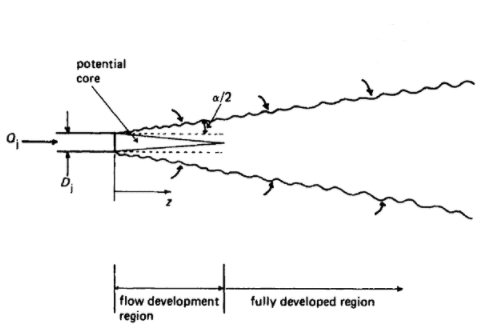

A turbulent jet emitted from a circular orifice.
:::

Empirical approximations of the velocity profile are often given with respect to this jet angle or, equivalently, the slope of the line (i.e. $\tan \frac{\alpha}{2}$). A related way of parameterizing the jet is in terms of a width parameter *b*. Typically this is the width of the velocity profile at half-height $b_{1/2}$ (though not always). With a constant jet angle and a self-similar velocity profile the width is directly proportional to the downstream distance $b_{1/2} = \tan \left( \frac{\alpha_{1/2} }{2} \right) z = c z$.

Where the value of *c* is can be found in the literature

|   c           | Reference        |
|:-------------:|:-----------------|
| 0.082 - 0.097 | @garde-2010      |
| 0.0848        | @bird-2007       |
| 0.10          | @rajaratnam-1974 |


At this point it is common to introduce a variable $\xi = {r \over b_{1/2} }$ or $\xi = {r \over z }$ where we are taking advantage of the fact that $b_{1/2} \propto z$. This is a *scaled* radial distance, using the width at half-height as a characteristic length. It is important to keep track of which definition of &xi; is being used as they differ by a scaling factor. The reason for this change of variables is the observation that the *shape* of the velocity profile is the same at any downstream point, it is merely scaled down in height and wider as one travels downstream. That is ${ \bar{v}_z \over \bar{v}_{max} } = f \left( \xi \right)$ is the same for all downstream distances (in the region where the jet is fully developed).

Another important observation is that the center-line velocity, the max velocity in the jet, decays with the inverse of the downstream distance, i.e.

$$ \bar{v}_{max} \propto z^{-1} $$

Putting those two observations together we expect the velocity profile to have the form

$$ \bar{v}_z = { \mathrm{const} \over z } f \left( \xi \right)$$

## Modeling Turbulent Jets

To set up our system we consider the case of a jet coming out of a point on an infinite surface into a quiescent medium, and that the jet and medium have the same density. This is a major simplification, but it makes the math easier to deal with. The coordinate system is centered at this point and all momentum in the jet ultimately comes from the origin.

The boundary conditions for the problem are:

1. at the center-line, *r=0*, the velocity is entirely in the z-direction
1. at the center-line, *r=0*, the velocity in the z-direction is at a maximum
1. as the radius increases, *r &rarr; &infin;* , the velocity in the z-direction goes to zero

### Time Averaged Values

Since we are concerned with turbulent flow, we can employ [Reynolds decomposition](https://en.wikipedia.org/wiki/Reynolds_decomposition) to transform the velocities like so

$$ v_z = \bar{v}_z + v^{\prime}_{z} $$

$$ v_r = \bar{v}_r + v^{\prime}_{r} $$

where $\bar{v}$ is the time-smoothed velocity and $v^{\prime}$ is an instantaneous deviation such that $\bar{v^{\prime} } = 0$ and the time-averaging operator follows the [Reynolds criteria](https://en.wikipedia.org/wiki/Reynolds_operator).



### Equations of Motion

The equations of motion in terms of time-smoothed velocities are
$$ \rho {D \mathbf{\bar{v} } \over D t } = - \nabla \bar{p} - \nabla \cdot \mathbf{ \bar{\tau} } + \rho \mathbf{g}  $$

Where $\mathbf{ \bar{\tau} }$ is the turbulent stress and includes the [Reynolds stresses](https://en.wikipedia.org/wiki/Reynolds_stress).

With the z component, in cylindrical coordinates[@bird-2007 page 847]

$$ \rho \left( {\partial \over \partial t} \bar{v}_z + \bar{v}_r {\partial \bar{v}_z \over \partial r} + {\bar{v}_\theta \over r} {\partial \bar{v}_z \over \partial \theta} + \bar{v}_z {\partial \bar{v}_z \over \partial z} \right) $$

$$ = - {\partial \bar{p} \over \partial z} - {1 \over r} {\partial \left( r \bar{\tau}_{rz} \right) \over \partial r } - {1 \over r} {\partial \bar{\tau}_{\theta z} \over \partial \theta } - {\partial \bar{\tau}_{z z} \over \partial z } + \rho g_z$$

Making the assumptions:

1. Zero pressure gradient ( ${\partial p \over \partial z} = 0$ )
1. Steady state ( ${\partial \over \partial t} \left( \cdots \right) = 0$ )
1. Axisymmetric ( ${\partial \over \partial \theta} \left( \cdots \right) = 0$ )
1. Effect of gravity can be neglected ( $\rho g_z \approx 0$ )
1. Within the jet $\mid v_z \mid \gg \mid v_r \mid$ and, by boundary layer approximation, $\bar{\tau}_{z z}$ can be neglected[^boundarylayer]

[^boundarylayer]: The boundary layer approximation is that
    
    $$ { \partial^2 \bar{v}_z \over \partial z^2 } \ll { \partial^2 \bar{v}_z \over \partial r^2 } $$
    
    and if we suppose that
    
    $$ \bar{\tau}_{z z} \propto { \partial \bar{v}_z \over \partial z } $$
    
    and 
    
    $$ \bar{\tau}_{r z} \propto {\partial \bar{v}_z \over \partial r} $$
    
    we find 
    
    $$ { \partial \bar{\tau}_{z z} \over \partial z } \propto {\partial^2 \bar{v}_z \over \partial z^2} \ll { \partial r \bar{\tau}_{r z} \over \partial r} \propto {\partial^2 \bar{v}_z \over \partial r^2} $$
    
    and thus we can assume the free turbulence is dominated by $\bar{\tau}_{r z}$ and
    
    $$ { \partial \bar{\tau}_{z z} \over \partial z} \approx 0 $$

The equations of motion, in the z direction, simplifies to

$$ \bar{v}_r {\partial \bar{v}_z \over \partial r} + \bar{v}_z {\partial \bar{v}_z \over \partial z} = - {1 \over \rho r} {\partial \left( r \bar{\tau}_{rz} \right) \over \partial r } $$

### Equation of Continuity

The continuity equation in terms of time-smoothed velocities is

$$ {\partial \rho \over \partial t} + \nabla \cdot \rho \mathbf{ \bar{v} } = 0 $$

In cylindrical coordinates[@bird-2007]

$$ {\partial \rho \over \partial t} + {1 \over r} {\partial \rho r \bar{v}_r \over \partial r} + {1 \over r} { \partial \rho \bar{v}_\theta \over \partial \theta} + {\partial \rho \bar{v}_z \over \partial z} = 0 $$

Making the assumptions:

1. Steady state ( ${\partial \over \partial t} \left( \cdots \right) = 0$ )
1. Axisymmetric ( ${\partial \over \partial \theta} \left( \cdots \right) = 0$ )
1. Incompressible ( ${\partial \rho \over \partial z} = {\partial \rho \over \partial r} = {\partial \rho \over \partial \theta} = 0$ )

The equation of continuity simplifies to

$$ {1 \over r} {\partial r \bar{v}_r \over \partial r} + {\partial \bar{v}_z \over \partial z} = 0 $$

### Stokes Stream Function

To simplify things down to working with one dependent variable we introduce a [Stokes stream function](https://en.wikipedia.org/wiki/Stokes_stream_function) $\psi$ defined such that

$$ \bar{v}_z = -{1 \over r} {\partial \psi \over \partial r} $$

and 

$$ \bar{v}_r = {1 \over r} {\partial \psi \over \partial z} $$

This definition ensures that the equation of continuity is satisfied. Suppose that $\psi = k z F\left(\xi\right)$, where *F* is a unitless function of $\xi = \frac{r}{z}$ and $k$ is a constant with units $[[ \mathrm{length} ]]^2 \times [[ \mathrm{time} ]]^{-1}$, then

$$ \bar{v}_z = -{1 \over r} {\partial \xi \over \partial r} {\partial \psi \over \partial \xi}
= -{1 \over r} {1 \over z} {k z F^{\prime} } $$

$$= -{k \over z} {F^{\prime} \over \xi} = { \mathrm{const} \over z } f \left( \xi \right)$$

Which matches what we expect from the empirical observations (which is why we supposed that form of the stream function in the first place). We can use this definition to work out some other useful terms

$$ {\partial \bar{v}_z \over \partial z} = {k \over z^2} F^{\prime \prime} $$

$$ {\partial \bar{v}_z \over \partial r} = -{k \over z^2} \left( { F^{\prime \prime} \over \xi} - { F^{\prime} \over \xi^2} \right) $$

$$ \bar{v}_r = { k \over z } \left( { F \over \xi } - F^{\prime} \right) $$

Substituting these back into the equation of motion, in the z direction, leads to

$$ \left( k \over z \right)^2 \left[ { F F^{\prime \prime} \over \xi } - {F F^{\prime} \over \xi^2} + { \left( F^{\prime} \right)^2 \over \xi } \right]  = {1 \over \rho} {\partial \over \partial r} \left( r \bar{\tau}_{rz} \right) $$

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = {1 \over \rho} {\partial \over \partial r} \left( r \bar{\tau}_{rz} \right) $$

Which is suggestive of the overall approach to follow: find an expression for the right hand side of this differential equation, integrate both sides with respect to *&xi;*, and solve for *F(&xi;)*

### Boundary Conditions

The initial boundary conditions of the problem were that:

1. $\bar{v}_r = 0$ at *r=0*
1. ${\partial \bar{v}_z \over \partial r} = 0$ at *r=0* (i.e. the velocity is at a maximum)
1. $\bar{v}_z \to 0$ as *r &rarr; &infin;* (i.e. the velocity decays to zero)

In terms of *F* and *&xi;* these become:

1. ${F \over \xi} - F^{\prime} = 0$ at *&xi;=0*, which implies *F=0* at *&xi;=0*
1. $F^{\prime \prime} - {F^{\prime} \over \xi}  = 0$ at *&xi;=0*
1. ${F^{\prime} \over \xi} \to 0$ as *&xi; &rarr; &infin;*


### Momentum Balance

To determine the constant *k* we use a momentum balance: the momentum flux, *J*, in the z direction is constant. Initially the momentum flux is

$$ J = \rho v_0^2 A_0 = \rho v_0^2 {\pi \over 4} d_0^2$$

and at some point *z* downstream of the origin we have

$$ J = \int_{0}^{2\pi} \int_{0}^{\infty} \rho \bar{v}_z^2 r dr d\theta $$

$$   = 2 \pi \rho \int_{0}^{\infty} \bar{v}_{z,max}^2 \left( \bar{v}_z \over \bar{v}_{z,max} \right)^2 r dr $$

$$   = 2 \pi \rho \bar{v}_{z,max}^2 \int_{0}^{\infty} \left( \bar{v}_z \over \bar{v}_{z,max} \right)^2 r dr $$

$$   = 2 \pi \rho k^2 \int_{0}^{\infty} \left( f\left( \xi \right) \right)^2 \xi d \xi $$
     
Taking the integral to be *I*, and equating the initial momentum flux with the momentum flux at point *z*[^bar_v_z]

[^bar_v_z]: I've played a little fast and loose with the definition of $\bar{v}_z$ in that I am implicitly assuming $f(\xi) = {-F^{\prime}(\xi) \over \xi}$ which isn't strictly true, there can be scaling factor. In practice all of these are collected together into one constant so it doesn't matter, but that is something to be aware of as the definition of *k* here is really $k\times \mathrm{const}$ where $\mathrm{const} = {-F^{\prime}(\xi) \over \xi} \div f(\xi)$

$$ J = \rho v_0^2 {\pi \over 4} d_0^2 = 2 \pi \rho k^2 I $$

$$ k = \sqrt{1 \over 8 I } v_0 d_0 $$

## Prandtl Mixing Length

The Prandtl mixing length model makes the assumption that momentum transfer occurs over some "mixing length" *l* such that

$$ \bar{\tau}_{rz} = -\rho l^2 \left| {\partial \bar{v}_z \over \partial r} \right| \left( {\partial \bar{v}_z \over \partial r} \right)$$

We suppose that the mixing length is proportional to the width of the velocity profile $b_{1/2}$, the characteristic length for the velocity profile, which we know is proportional to the downstream distance *z*

$$ l \propto b_{1/2} \propto z$$

$$ l = c z $$

Where $c$ is some unitless constant. Making the observation that ${\partial \bar{v}_z \over \partial r} < 0$ we can make the simplification

$$ \bar{\tau}_{rz} = \rho c^2 z^2 \left( {\partial \bar{v}_z \over \partial r} \right)^2$$

### Setting up the ODE

Recall that the equation of motion in the z direction is (in terms of the unitless function *F*) is

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = {1 \over \rho} {\partial \over \partial r} \left( r \bar{\tau}_{rz} \right) $$

Substituting the expression for $\bar{\tau}_{rz}$ we have

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = c^2 z^2 {\partial \over \partial r} \left( r \left( \partial \bar{v}_{z} \over \partial r \right)^2 \right) $$

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = c^2 z^2 \left( \left( \partial \bar{v}_{z} \over \partial r \right)^2 + 2r \left( \partial \bar{v}_{z} \over \partial r \right) \left( \partial^2 \bar{v}_{z} \over \partial r^2 \right) \right) $$

Substituting in the expressions for ${\partial \bar{v}_z \over \partial r}$ and ${\partial^2 \bar{v}_z \over \partial r^2}$ we arrive at

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = c^2 \left(k \over z \right)^2 \left( 1 \over \xi \right)\left( F^{\prime \prime} - { F^{\prime} \over \xi } \right) \left(  2 F^{\prime \prime \prime} - 3 { F^{\prime \prime} \over \xi } + { F^{\prime} \over \xi^2 }\right) $$

$$ { d \over d \xi } \left( F F^{\prime} \over \xi \right) = c^2 { d \over d \xi } \left( 1 \over \xi \right)\left( F^{\prime \prime} - { F^{\prime} \over \xi } \right)^2 $$

Integrating both sides

$$ \left( F F^{\prime} \over \xi \right) = c^2 \left( 1 \over \xi \right)\left( F^{\prime \prime} - { F^{\prime} \over \xi } \right)^2 + \mathrm{const}$$

By applying the boundary conditions we find the constant of integration is zero, thus

$$ F F^{\prime} = c^2 \left( F^{\prime \prime} - { F^{\prime} \over \xi } \right)^2 $$

Making the substitution $\phi = a^{-1} \xi$ where $a = c^{2/3}$ 

$$ F F^{\prime} = \left( F^{\prime \prime} - { F^{\prime} \over \phi } \right)^2 $$

$$ F^{\prime \prime} = { F^{\prime} \over \phi } + \sqrt{ F F^{\prime} } $$

Which is in a form that can be solved numerically.

### Solving the ODE

We can solve the ODE and perform the integral needed for the momentum balance at the same time. First we define a vector *u* such that:

$$ \mathbf{u} =  \begin{bmatrix} u_{1} \\ u_{2} \end{bmatrix} = \begin{bmatrix} F \\ F^{\prime} \end{bmatrix}$$

The ODE then becomes:

$$ {d \mathbf{u} \over dt } = \begin{bmatrix} F^{\prime} \\ F^{\prime \prime} \end{bmatrix}  = \begin{bmatrix} u_{2} \\ \frac{ u_{2} }{t} + \sqrt{ u_{1} u_{2} } \end{bmatrix} $$

Which has a singularity at *t=0*, but one that can be easily dealt with by setting the initial value of the derivatives to[^init-vals]

[^init-vals]:From the boundary conditions we know *F'(0) = 0* but what about *F''*? Taking the ratio 
    
    $$ { \bar{v}_z \over \bar{v}_{z,max} }_{r=0} = - {F^{\prime} \over \phi }_{\phi=0} = 1 $$
    
    we find ${F^{\prime} \over \phi } = -1$ at *&phi; = 0* and, from the boundary conditions, 
    
    $$ F^{\prime \prime} = {F^{\prime} \over \phi } $$
    
    at *&phi; = 0*, therefore *F''(0) = -1*

$$ {d \mathbf{u} \over dt }_{t=0} = \begin{bmatrix} 0 \\ -1 \end{bmatrix}$$

Putting that together, the ODE can be integrated easily[^limits]

[^limits]: Because of how $\bar{v}_z$ and $\bar{v}_r$ were defined $-{ F^{\prime} \over \phi } \ge 0$, i.e. ${ F^{\prime} \over \phi } \le 0$. For the signs to work out, $F \le 0$ and $F^{\prime} \le 0$ (since $F F^{\prime} \ge 0$)

In [1]:
using StaticArrays
using DifferentialEquations: ODEProblem, Tsit5, solve, TerminateSteadyState

function sys(u,p,t)
    u₁, u₂ = u[1], u[2]
    if t > 0.0
        du₁ = u₂
        du₂ = u₂/t + √(max((u₁*u₂),0))
    else
        du₁ = 0.0
        du₂ = -1.0
    end
    
    return SA[du₁; du₂]
end

u0    = SA[0.0; 0.0]
tspan = (0.0, 6.0)
prob  = ODEProblem(sys, u0, tspan)
sol   = solve(prob, Tsit5(), dtmax=0.1, callback=TerminateSteadyState())

print(sol.retcode)

Success

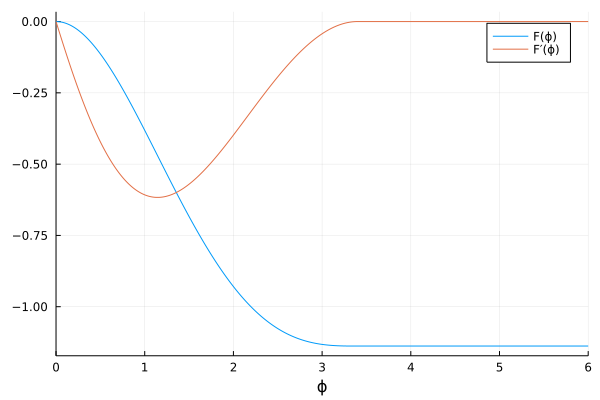

In [2]:
#| echo: false
#| label: fig-prandtl-stream-functions
#| fig-cap: "The numerical integration of F(&phi;), Prandtl mixing length theory."

using Plots: plot, plot!

let

plot(sol, label=["F(ϕ)" "F′(ϕ)"], xlabel="ϕ")

end

Using the solution in terms of &phi; we can write a function *f(&xi;)*

In [3]:
#| output: false
function f_pml(ξ; a=0.066)
    ϕ = abs(ξ)/a
    
    if ϕ >0
        F, F′ = sol(ϕ)
        f = -F′/ϕ
        f  = max(f, 0)
    else
        f = 1
    end
    
    return f
end

f_pml (generic function with 1 method)

### Comparison with Tollmien

The classic treatment of the Prandtl mixing length model is from @tollmien-1926 in which, instead of solving numerically in the way shown above, the ODE is further transformed and a series expansion is used to generate a table of results. More often than not it is these tabulated values, or similar ones[@rajaratnam-1974 page 39. The table has an error at &phi;=1: the value of ${F^{\prime} \over \phi }$ should be 0.606 but is given as 0.505 (presumably a typo)], that are presented as the solution to the model.

We can easily compare the result here with the tabulated values and verify for ourselves that we have indeed solved the right differential equation. Though by solving numerically in this way we can control the level of precision and easily generate smooth interpolations. In my opinion, this makes using the ODE solution far more convenient than the tabulated values.

In [4]:
#| echo: false
#| output: false
using CSV

tollmien_curve = CSV.File(IOBuffer("""
ϕ F′/ϕ
0.0000 1.000
0.0625 0.995
0.1250 0.977
0.2500 0.941
0.3750 0.895
0.5000 0.843
0.6250 0.789
0.7500 0.727
1.0000 0.606
1.2500 0.487
1.5000 0.376
1.7500 0.283
2.0000 0.198
2.2500 0.130
2.5000 0.077
2.7500 0.039
3.0000 0.014
3.2500 0.002
3.4000 0.000
"""), delim=" ", types=[Float64, Float64], header=true);

In [5]:
#| echo: false
#| output: false
rajaratnam_curve = CSV.File(IOBuffer("""
ϕ F′/ϕ
0.0 1.000
0.1 0.984
0.2 0.958
0.3 0.922
0.4 0.884
0.5 0.843
0.6 0.795
0.7 0.748
0.8 0.700
0.9 0.653
1.0 0.505
1.1 0.555
1.2 0.510
1.3 0.470
1.4 0.425
1.5 0.378
1.6 0.340
1.7 0.300
1.8 0.265
1.9 0.230
2.0 0.198
2.1 0.169
2.2 0.140
2.3 0.117
2.4 0.094
2.5 0.075
2.6 0.059
2.7 0.046
2.8 0.034
2.9 0.024
3.0 0.017
3.1 0.011
3.2 0.007
3.3 0.003
3.4 0.000
"""), delim=" ", types=[Float64, Float64], header=true);

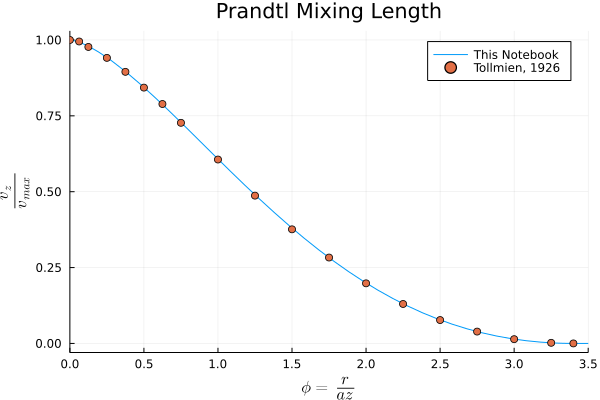

In [6]:
#| echo: false
#| label: fig-pmt-tollmien
#| fig-cap: "This solution versus the tabulated results of Tollmien, demonstrating that this is the correct solution but by a different means."
using LaTeXStrings

let

plot(sol.t, f_pml.(sol.t, a=1), lab="This Notebook")
#plot!(rajaratnam_curve[!, :ϕ], rajaratnam_curve[!, "F′/ϕ"], lab="Rajaratnam, 1976", seriestype=:scatter)
plot!(tollmien_curve["ϕ"], tollmien_curve["F′/ϕ"], lab="Tollmien, 1926", seriestype=:scatter)
plot!(title="Prandtl Mixing Length",
      ylabel=L"\frac{v_z}{v_{max}}",
      xlabel=L"\phi = \frac{r}{az}",
      xlim=(0,3.5),
      legend=:topright)
    
end

### Width at Half Height

The width at half height, $b_{1/2}$, is an important parameter and often velocity profiles are scaled relative to this. To compare different models on a fair basis, it is a good idea to determine what the model parameters are relative to $b_{1/2}$. Then each model can be scaled to the same $b_{1/2}$ and compared, apples-to-apples.

In this case we don't have a closed form for the velocity profile so we need to solve for &phi; such that *f(&phi;)=0* numerically.

In [7]:
using Roots: find_zero

ϕ_half = find_zero( ϕ -> f_pml(ϕ; a=1)-0.5, (1, 1.25))

1.2277665940765845

and we then write the model parameter *a* in terms of $b_{1/2}$

In [8]:
#| echo: false

L"$$ a = \frac{1}{\phi_{1/2}} \frac{b_{1/2}}{z} = %$(round(1/ϕ_half, digits=3)) \frac{b_{1/2}}{z} $$"

L"$$ a = \frac{1}{\phi_{1/2}} \frac{b_{1/2}}{z} = 0.814 \frac{b_{1/2}}{z} $$"

Using a default value for ${ b_{1/2} \over z } = 0.0848$ we arrive at

In [9]:
b_half = 0.0848

a = b_half/ϕ_half

0.06906850244103516

Several sources have tabulated values for *a*

| a     | Reference        |
|:-----:|:-----------------|
| 0.063 | @tollmien-1926   |
| 0.066 | @rajaratnam-1974 |

and the result of this notebook compares with those

### Velocity Profile

Now that we have completed the integration we can calculate the parameter *k*, using the equation derived from the momentum balance

$$ k = \sqrt{1 \over 8 I } v_0 d_0 $$

with the value of the integral coming directly from the ode solver

In [10]:
using NumericalIntegration: integrate

ϕ, F′ = sol.t, sol[2,:]

# trim any unphysical values
F′[F′.>0] .= 0.0

function integrand(ϕ, F′)
    if ϕ>0
        return F′^2/ϕ
    else
        return 0
    end
end

I = integrate(ϕ, integrand.(ϕ, F′))
I = a^2 * I

0.002573069044757039

Allowing us to write the velocity profile as

In [11]:
#| echo: false

L"$$ \bar{v}_z = %$(round(√(1/(8*I)), digits=2)) { v_0 d_0 \over z} f(\xi) $$"


L"$$ \bar{v}_z = 6.97 { v_0 d_0 \over z} f(\xi) $$"

## Eddy Viscosity

The eddy viscosity model makes the assumption that the turbulent shear stress depends on the rate of strain in a manner that is analogous to laminar flow, with the constant of proportionality being the *eddy viscosity* &epsilon;:

$$ \bar{\tau}_{rz} = - \rho \varepsilon {\partial \bar{v}_z \over \partial r}$$


### Setting up the ODE

Recall that the equation of motion in the z direction is (in terms of the unitless function *F*)

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = {1 \over \rho} {\partial \over \partial r} \left( r \bar{\tau}_{rz} \right) $$

Substituting the expression for $\bar{\tau}_{rz}$ we have

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = - \varepsilon {\partial \over \partial r} \left( r \left( \partial \bar{v}_{z} \over \partial r \right) \right) $$

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = - \varepsilon \left( \left( \partial \bar{v}_{rz} \over \partial r \right) + r \left( \partial^2 \bar{v}_{rz} \over \partial r^2 \right) \right) $$

Substituting in the expressions for ${\partial \bar{v}_z \over \partial r}$ and ${\partial^2 \bar{v}_z \over \partial r^2}$ we arrive at

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = { k \varepsilon \over z^2} \left( F^{\prime \prime \prime} - { F^{\prime \prime} \over \xi } + { F^{\prime} \over \xi^2 }  \right) $$

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = { k \varepsilon \over z^2} { d \over d \xi } \left( F^{\prime \prime} - { F^{\prime} \over \xi } \right) $$

at this point we note that *k* and &epsilon; have the same units of $[[ \mathrm{length} ]]^2 \times [[ \mathrm{time} ]]^{-1}$ and are independent of *z* and &xi;, so we propose that $\varepsilon = c k$ where *c* is some unknown constant of proportionality.

$$ \left( k \over z \right)^2 { d \over d \xi } \left( F F^{\prime} \over \xi \right) = c \left( k \over z \right)^2 { d \over d \xi } \left( F^{\prime \prime} - { F^{\prime} \over \xi } \right) $$

$$ { d \over d \xi } \left( F F^{\prime} \over \xi \right) = c { d \over d \xi } \left( F^{\prime \prime} - { F^{\prime} \over \xi } \right) $$

Integrating both sides

$$ { F F^{\prime} \over \xi } = c \left( F^{\prime \prime} - { F^{\prime} \over \xi } \right) + \mathrm{const}$$

By applying the boundary conditions we find the constant of integration is zero, thus

$$ F F^{\prime} = c \left( \xi F^{\prime \prime} -  F^{\prime} \right) $$

$${ d \over d \xi } \left( \frac{1}{2} F^2 \right) = c { d \over d \xi } \left( \xi F^{\prime} -  2 F \right) $$

Integrating both sides

$$ \frac{1}{2} F^2 = c \left( \xi F^{\prime} -  2 F \right) + \mathrm{const}$$

By applying the boundary conditions we find the constant of integration is zero, thus

$$ c \xi F^{\prime} = \frac{1}{2} F^2 +  2c F $$

Which is separable

$$ \int { d \xi \over \xi} = \int { c \over {\frac{1}{2} F^2 +  2c F} } dF $$

Integrating one last time

$$ \log \left( C_1 \xi \right) = \frac{1}{2} \log \left( F \over F + 4 c \right) $$

Where *C<sub>1</sub>* is an undetermined constant of integration. Re-arranging and solving for *F* we arrive at

$$ F\left( \xi \right) = { 4 c C_1 \xi^2 \over {1 - C_1 \xi^2 } } $$

A common substitution is $C_1 = - \left( C_2 \over 2 \right)^2$ then

$$ F\left( \xi \right) = { - c \left( C_2 \xi \right)^2 \over {1 + \frac{1}{4} \left( C_2 \xi \right)^2 } } $$

What we need, for the velocity profile, is the first derivative of *F*, which is

$$ F^{\prime}\left( \xi \right) = { - 2 c C_2^2 \xi \over \left( 1 + \left( C_2 \xi \over 2 \right)^2 \right)^2 } $$

and finally

$$ \bar{v}_z = -{k \over z} {F^{\prime} \over \xi} $$

$$ = -{k \over z} { 1 \over \xi }{ - 2 c C_2^2 \xi \over \left( 1 + \left( C_2 \xi \over 2 \right)^2 \right)^2 } $$

$$ = {2 \varepsilon C_2^2 \over z} \left( 1 + \left( C_2 \xi \over 2 \right)^2 \right)^{-2} $$
 
$$ f \left( \xi \right) = { \bar{v}_z \over \bar{v}_{z,max} } =  \left( 1 + \left( C_2 \xi \over 2 \right)^2 \right)^{-2} $$

In [12]:
#| output: false
f_ev(ξ; C₂=15.1) = ( 1 + (C₂*ξ/2)^2 )^-2

f_ev (generic function with 1 method)

### Width at Half Height

Since we have a convenient closed form for the velocity profile, we can calculate what the parameter $C_2$ is in terms of the width at half height rather easily.

$$ f(\xi) =  \left( 1 + \left( C_2 \xi \over 2 \right)^2 \right)^{-2} $$

$$ \frac{1}{2} =  \left( 1 + \left( {C_2 \over 2} { b_{1/2} \over z }\right)^2 \right)^{-2} $$

$$ C_2 = 2 \sqrt{\sqrt{2}-1} \frac{z}{ b_{1/2} } $$

using the same parameterization as above we get

In [13]:
C₂ = 2*√(√(2)-1)/b_half

15.179109738339214

### Velocity Profile

Returning to the momentum balance, we need to solve the integral:

$$ I = \int_{0}^{\infty} f\left( \xi \right)^2 \xi d \xi\\
= \int_{0}^{\infty} \xi \left( 1 + \left( C_2 \xi \over 2 \right)^2 \right)^{-4} d\xi $$

Which [can be integrated](https://www.wolframalpha.com/input?i2d=true&i=Integrate%5B%CE%BE*Power%5B%5C%2840%291%2BDivide%5B1%2C4%5DPower%5Bc*%CE%BE%2C2%5D%5C%2841%29%2C-4%5D%2C%7B%CE%BE%2C0%2C%E2%88%9E%7D%5D) to give
$$ I = {2 \over 3} C_2^{-2} $$

and finally

$$ k = \sqrt{ 3 \over 16 } C_2 v_0 d_0 $$

with the velocity profile as

In [14]:
#| echo: false

L"$$ \bar{v}_z = %$(round(√(3/16)*C₂, digits=2)) { v_0 d_0 \over z} \left( 1 + %$(round((C₂/2)^2, digits=2)) \xi^2 \right)^{-2} $$"

L"$$ \bar{v}_z = 6.57 { v_0 d_0 \over z} \left( 1 + 57.6 \xi^2 \right)^{-2} $$"

## Empirical Velocity Profiles

Perhaps the most widely used turbulent jet model is simply an empirical gaussian fit to the data. These are easy to use -- no solving of ODEs required -- and fitting them to data is relatively straight forward. There is no real theoretical basis that I am aware of, merely based on the observation that a gaussian function fits the velocity profile well.

$$ f \left( \xi \right) = \exp \left( -c \xi^2 \right) $$

Where *c* is a parameter determined by fitting to a dataset.

In [15]:
#| output: false
f_emp(ξ; c=72) = exp(-c*ξ^2)

f_emp (generic function with 1 method)

### Width at Half Height

Since we have a convenient closed form for the velocity profile, we can calculate what the parameter $c$ is in terms of the width at half height rather easily

$$ f(\xi) =  \exp \left( -c \xi^2 \right) $$

$$ \frac{1}{2} =  \exp \left( - c  \left( \frac{ b_{1/2} }{z} \right)^2 \right) $$

$$ c = \ln \left( 2 \right) \left( \frac{z}{ b_{1/2} } \right)^2 $$

using the same parameterization as above we get

In [16]:
c = log(2)/b_half^2

96.39039423504045

### Velocity Profile

Returning to the momentum balance, we need to solve the integral:

$$ I = \int_{0}^{\infty} f\left( \xi \right)^2 \xi d \xi\\
= \int_{0}^{\infty} \xi \exp \left( -2 c \xi^2 \right) d\xi $$

Which [can be integrated](https://www.wolframalpha.com/input?i2d=true&i=Integrate%5B%CE%BE*Exp%5B-2*c*Power%5B%CE%BE%2C2%5D%5D%2C%7B%CE%BE%2C0%2C%E2%88%9E%7D%5D) to give

$$ I = {1 \over 4 c} $$

and finally

$$ k = \sqrt{ c \over 2 } v_0 d_0 $$


with the velocity profile as

In [17]:
#| echo: false

L"$$ \bar{v}_z = %$(round(√(c/2), digits=2)) { v_0 d_0 \over z} \exp\left( %$(round(-2*c, digits=0)) \xi^2 \right) $$"

L"$$ \bar{v}_z = 6.94 { v_0 d_0 \over z} \exp\left( -193.0 \xi^2 \right) $$"

## Comparing the Models

At this point two models of velocity were derived using different models of the free turbulent stress and one purely empirical model was introduced. Each of these models uses a different set of parameters, and have different strengths and weaknesses in terms of usability. To compare them like-for-like we can scale each to the same width at half height, which is shown below along with some measured data[@pope-2000, points captured from a figure using [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer)]


We can also calculate a Mean Square Error (MSE) and evaluate which model is a better fit to the observed velocity profile. 

In [18]:
#| echo: false

# Stephen B. Pope, Turbulent Flows, Cambridge University Press, 2000
# Points captured using WebPlotDigitizer https://automeris.io/WebPlotDigitizer
measured = CSV.File(IOBuffer("""
r/b	v/v_max
2.39260489	0.03021105
2.26180106	0.04218027
2.19014967	0.04208358
2.19953334	0.05424199
2.11544186	0.06087615
2.09057849	0.07973598
2.01579501	0.07423695
1.98156058	0.08498697
1.98470529	0.09443790
1.86637097	0.10912301
1.83211553	0.11312537
1.85393929	0.11855293
1.76677878	0.14002775
1.70451947	0.15478853
1.66411334	0.18442361
1.64543429	0.18844699
1.57074329	0.21263769
1.57389641	0.22478769
1.54584630	0.22070125
1.49920962	0.25032792
1.47433364	0.26513916
1.44011183	0.27993778
1.34987808	0.31490372
1.36550492	0.33111915
1.33122425	0.32702430
1.29389557	0.34451778
1.29080552	0.35261078
1.21925923	0.38625242
1.16326831	0.41316741
1.13533171	0.44551837
1.10106365	0.44547213
1.11666527	0.45359035
1.00780711	0.51012360
0.99537543	0.51955352
0.92384176	0.55724376
0.89896578	0.57205499
0.87718406	0.58012276
0.89277306	0.58419238
0.78079122	0.63802237
0.75278315	0.64743126
0.77460271	0.65150929
0.73428487	0.70948457
0.68755571	0.70942151
0.67206760	0.73774069
0.61290255	0.74575801
0.55696208	0.78886740
0.56012360	0.80371647
0.48231733	0.82790297
0.48859413	0.84275624
0.42633482	0.85751703
0.45127806	0.86429833
0.35482637	0.90330446
0.36730430	0.90871941
0.32995039	0.91811570
0.33309510	0.92756664
0.20862692	0.97328260
0.23668965	0.98141764
0.18685361	0.98404944
0.18685361	0.98404944
0.13391070	0.98937610
0.11522324	0.99070041
0.09031783	0.99606491
0.06541243	1.00142941
0.02492643	1.00542336

"""), delim="\t", types=[Float64, Float64], header=true);

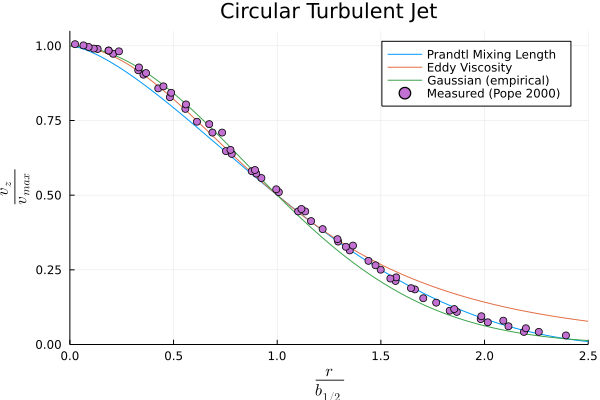

Prandtl Mixing Length Model MSE 0.00051
Eddy Viscosity Model        MSE 0.00092
Gaussian (empirical) Model  MSE 0.00054


In [19]:
#| echo: false
#| label: fig-compare-models
#| fig-cap: "Comparing all three turbulent jet models to the observed velocity profile."

using Statistics: mean

let

function MSE(f, x, y)
    err = @. f(x) - y
    sqr_err = err.*err
    return mean( sqr_err )
end

rbs = 0.0:0.01:2.5
ξs = b_half*collect(rbs)

plt = plot(rbs, f_pml.(ξs; a=a), lab="Prandtl Mixing Length")
plot!(rbs, f_ev.(ξs; C₂=C₂), lab="Eddy Viscosity")
plot!(rbs, f_emp.(ξs; c=c), lab="Gaussian (empirical)")
plot!(measured["r/b"], measured["v/v_max"], lab="Measured (Pope 2000)", seriestype=:scatter)
plot!(title="Circular Turbulent Jet",
      ylabel=L"\frac{v_z}{v_{max}}",
      ylim = (0, 1.05),
      xlabel=L"\frac{r}{b_{1/2}}",
      xlim = (0.0, 2.5),
      legend=:topright)

    
meas_ξ = b_half*measured["r/b"]
meas_f = measured["v/v_max"]
    
pml_mse = MSE( (x) -> f_pml(x; a=a), meas_ξ, meas_f)
ev_mse  = MSE( (x) -> f_ev(x; C₂=C₂), meas_ξ, meas_f)
emp_mse = MSE( (x) -> f_emp(x; c=c), meas_ξ, meas_f)

display(plt)

println("Prandtl Mixing Length Model MSE $(round(pml_mse, digits=5))")
println("Eddy Viscosity Model        MSE $(round(ev_mse, digits=5))")
println("Gaussian (empirical) Model  MSE $(round(emp_mse, digits=5))")
    
end

Interestingly the Prandtl mixing length model works the best, though the gaussian fit is close enough as to be essentially the same given this data set. Which is convenient as a gaussian fit is easier to work with. The eddy viscosity model is the easiest to derive, however it clearly does not work as well for the outer parts of the jet.

The above approach, the one you will most likely see in the literature, compares each model scaled to the same height and width. Which is sensible if one is planning on fitting data, and allowing that the height and width to be free parameters. However we know, from the analysis above, that the height of each model is dependent upon the width, so might be instructive to look at how that plays out in practice.

Suppose we are looking at a velocity profile far enough downstream to be in the fully developed flow, say $z = 7 d_0$

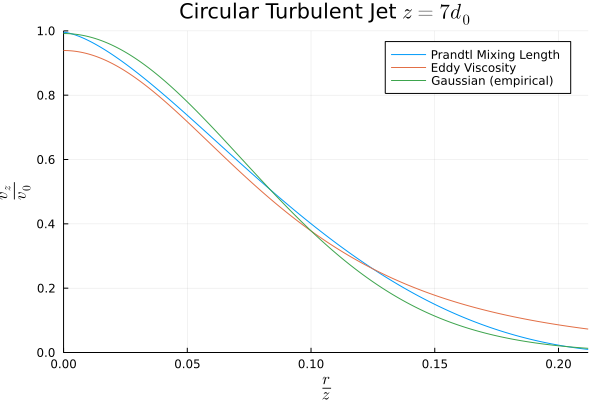

In [20]:
#| echo: false
#| label: fig-equal-width
#| fig-cap: "A comparison of the three turbulent jet models with an identical half-width, with the height calculated from the momentum balance."

let

rbs = 0.0:0.01:2.5
ξs = b_half*collect(rbs)

vmax1 = √(1/(8*I))/7.0
vmax2 = √(3/16)*C₂/7.0
vmax3 = √(c/2)/7.0
    
plt = plot(ξs, vmax1*f_pml.(ξs; a=a), lab="Prandtl Mixing Length")
plot!(ξs, vmax2*f_ev.(ξs; C₂=C₂), lab="Eddy Viscosity")
plot!(ξs, vmax3*f_emp.(ξs; c=c), lab="Gaussian (empirical)")
plot!(title=L"Circular Turbulent Jet $z=7d_0$",
      ylabel=L"\frac{v_z}{v_0}",
      ylim = (0, 1.00),
      xlabel=L"\frac{r}{z}",
      xlim = (0.0, 2.5*b_half),
      legend=:topright)

end

Note that in the region near the center-line the three models are no longer particularly close to one another and the eddy viscosity and prandtl mixing length models have changed places. Relative to the predicted $v_{max}$ the the eddy viscosity model stays high when compared to the prandtl mixing length model, however the eddy viscosity model predicts a lower $v_{max}$ such that the effect is entirely reversed.

It's also worth noting that the gaussian fit and the prandtl mixing length model track one another reasonably well. I have seen a gaussian fit *of* the Tollmien tabulated results used in some papers when a smooth interpolation of the intermediate values is required and this suggests that may not be a bad idea. Though, to me, just solving the ode is easier. On a modern machine it takes milliseconds or less and a good ode package like `DifferentialEquations.jl` provides a higher-order interpolation for free.

This comparison has been done with each of the model parameters set based on a shared width. However there are as many different ways of arriving at the model parameters as there are datasets to fit against. There is a wide spread in tabulated values in the literature and so the predictions of two independently arrived at models can be quite different due all of these factors coming together.

## Where to go from here

All of this work was to determine the *velocity* field, which is not necessarily what anyone cares about. In a release scenario, for example, it is concentration that is most relevant. For a heat transfer application, perhaps, you may care about the temperature field instead. However, with the velocity field the concentrations, temperatures, total entrained flow, etc. can be easily derived.

## References
::: {#refs}
:::